![FIFA 21](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*XqzkYPFP7WTAvBLAhSUi5Q.png)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv
/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv


**Initial Setup**

Importing the importance dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting style
sns.set(style='whitegrid')

## Data Cleaning & Exploratory Data Analysis

### 1. Load the Data


In [5]:
file_name = "/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv"


In [6]:
# Load just the header to check column names
df_temp = pd.read_csv(file_name, nrows=0)
col_76_name = df_temp.columns[76]
print(f"Column 76 is: {col_76_name}")

Column 76 is: Hits


In [29]:
# Convertinf data type of hits into str
df = pd.read_csv(file_name, dtype={'Hits': str})

In [9]:
# Get the first 5 rows
df.head(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


### Exploring the Data

In [10]:
# Get a summary of the DataFrame
df.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,...,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,...,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.000000,63.000000,62.000000,64.000000,68.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,259216.000000,53.000000,93.000000,95.000000,93.000000,437.000000,94.000000,95.000000,93.000000,94.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [11]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [12]:
# Get statistical summary for numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [13]:
# Get the dimensions of the DataFrame (rows, columns)
df.shape

(18979, 77)

In [14]:
# Force pandas to display every single column
pd.set_option('display.max_columns', None)
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [17]:
# Check unique values to confirm the mix of units
print(df['Height'].unique())
print(df['Weight'].unique())
print(df['W/F'].unique()) 

['170cm' '187cm' '188cm' '181cm' '175cm' '184cm' '191cm' '178cm' '193cm'
 '185cm' '199cm' '173cm' '168cm' '176cm' '177cm' '183cm' '180cm' '189cm'
 '179cm' '195cm' '172cm' '182cm' '186cm' '192cm' '165cm' '194cm' '167cm'
 '196cm' '163cm' '190cm' '174cm' '169cm' '171cm' '197cm' '200cm' '166cm'
 '6\'2"' '164cm' '198cm' '6\'3"' '6\'5"' '5\'11"' '6\'4"' '6\'1"' '6\'0"'
 '5\'10"' '5\'9"' '5\'6"' '5\'7"' '5\'4"' '201cm' '158cm' '162cm' '161cm'
 '160cm' '203cm' '157cm' '156cm' '202cm' '159cm' '206cm' '155cm']
['72kg' '83kg' '87kg' '70kg' '68kg' '80kg' '71kg' '91kg' '73kg' '85kg'
 '92kg' '69kg' '84kg' '96kg' '81kg' '82kg' '75kg' '86kg' '89kg' '74kg'
 '76kg' '64kg' '78kg' '90kg' '66kg' '60kg' '94kg' '79kg' '67kg' '65kg'
 '59kg' '61kg' '93kg' '88kg' '97kg' '77kg' '62kg' '63kg' '95kg' '100kg'
 '58kg' '183lbs' '179lbs' '172lbs' '196lbs' '176lbs' '185lbs' '170lbs'
 '203lbs' '168lbs' '161lbs' '146lbs' '130lbs' '190lbs' '174lbs' '148lbs'
 '165lbs' '159lbs' '192lbs' '181lbs' '139lbs' '154lbs' '157lbs' '

In [16]:
df[['Value', 'Wage', 'Release Clause']].head()

,Value,Wage,Release Clause
0,€103.5M,€560K,€138.4M
1,€63M,€220K,€75.9M
2,€120M,€125K,€159.4M
3,€129M,€370K,€161M
4,€132M,€270K,€166.5M


In [18]:
print(df['Club'].head().values)

['\n\n\n\nFC Barcelona' '\n\n\n\nJuventus' '\n\n\n\nAtlético Madrid'
 '\n\n\n\nManchester City' '\n\n\n\nParis Saint-Germain']


In [19]:
print(df['Joined'].dtype)

object


### Data Quality Issues Identified
- Inconsistent Units (Height/Weight): The Height column mixes "cm" with "feet/inches" (e.g., "5'7" vs "170cm"), and Weight mixes "kg" with "lbs".

- Currency Formatting (Value, Wage, Release Clause): Financial columns are stored as object strings with currency symbols ('€') and suffixes ('K', 'M') instead of numeric values (e.g., "€100M").

- Embedded Characters: Columns like W/F, SM, and IR contain unnecessary special characters (e.g., "4 ★") preventing numerical analysis.

- Hidden Newlines: The Club column contains hidden newline characters (\n) at the start of string values.

- Incorrect Data Types: The Joined column is stored as a string rather than a datetime object, making time-based calculations impossible.

- Mixed Data Types: Column 76 (Loan Date End) contains mixed types, causing memory warnings during load.

- Redundant Columns: The Contract column duplicates information available in Joined and Contract Valid Until, and requires parsing to be useful.

## 2. Data Cleaning & Feature Engineering

### Problem Statement 1
#### Inconsistent Units (Height/Weight): The Height column mixes "cm" with "feet/inches" (e.g., "5'7" vs "170cm"), and Weight mixes "kg" with "lbs".

In [30]:
# 1. Define the conversion function
def convert_height(height):
    if "cm" in height:
        return int(height.replace("cm",""))
    elif "'" in height:
        # Split 5'7" into [5, 7]
        feet,inches = height.split("'")
        inches = inches.replace("\"", "") # Remove the quote mark at the end

        # Math: (Feet * 30.48) + (Inches * 2.54)
        return round((int(feet) * 30.48) + (int(inches) * 2.54))
    else:
        return height

# 2. Apply it to the Height column
df['Height'] = df['Height'].apply(convert_height)

# 3. Rename column to be specific
df.rename(columns={'Height': 'Height_cm'}, inplace=True)

# 4. Verify
print(df['Height_cm'].head())
print(df['Height_cm'].unique()) # Check if any weird strings remain

0    170
1    187
2    188
3    181
4    175
Name: Height_cm, dtype: int64
[170 187 188 181 175 184 191 178 193 185 199 173 168 176 177 183 180 189
 179 195 172 182 186 192 165 194 167 196 163 190 174 169 171 197 200 166
 164 198 201 158 162 161 160 203 157 156 202 159 206 155]


In [31]:
# 1. Define the conversion function
def convert_weight(weight):
    if "kg" in weight:
        return int(weight.replace("kg", ""))
    elif "lbs" in weight:
        lbs = int(weight.replace("lbs", ""))
        return round(lbs * 0.453592) # Standard conversion
    else:
        return weight

# 2. Apply it to the Weight column
df['Weight'] = df['Weight'].apply(convert_weight)

# 3. Rename column
df.rename(columns={'Weight': 'Weight_kg'}, inplace=True)

# 4. Verify
print(df['Weight_kg'].head())
print(df['Weight_kg'].unique())

0    72
1    83
2    87
3    70
4    68
Name: Weight_kg, dtype: int64
[ 72  83  87  70  68  80  71  91  73  85  92  69  84  96  81  82  75  86
  89  74  76  64  78  90  66  60  94  79  67  65  59  61  93  88  97  77
  62  63  95 100  58  98 103  99 102  56 101  57  55 104 107 110  53  50
  54  52]


### Problem Statement 2
#### Currency Formatting (Value, Wage, Release Clause): Financial columns are stored as object strings with currency symbols ('€') and suffixes ('K', 'M') instead of numeric values (e.g., "€100M").

In [34]:
def convert_money(value):
    # 1. Handle NaN/Empty values immediately
    if pd.isna(value):
        return 0

    # 2. Strip the Euro symbol and whitespace
    value = value.replace('€', '').strip()

    # 3. Handle 'M' (Millions)
    if 'M' in value:
        value = value.replace('M','')
        return float(value) * 1_000_000

    # 4. Handle 'K' (Thousands)
    if 'K' in value:
        value = value.replace('K','')
        return float(value) * 1_000

    # 5. Handle standard numbers (no suffix)
    else:
        return float(value)


In [35]:
# We apply this to all three financial columns
cols_to_clean = ['Value', 'Wage', 'Release Clause']

for col in cols_to_clean:
    df[col] = df[col].apply(convert_money)

# Check the results.
print(df[cols_to_clean].head())
print("New Data Types:")
print(df[cols_to_clean].dtypes)

         Value      Wage  Release Clause
0  103500000.0  560000.0     138400000.0
1   63000000.0  220000.0      75900000.0
2  120000000.0  125000.0     159400000.0
3  129000000.0  370000.0     161000000.0
4  132000000.0  270000.0     166500000.0
New Data Types:
Value             float64
Wage              float64
Release Clause    float64
dtype: object


### Problem Statement 3
#### Embedded Characters: Columns like W/F, SM, and IR contain unnecessary special characters (e.g., "4 ★") preventing numerical analysis.

In [37]:
# 1. Inspect unique values before cleaning 
print(df['W/F'].unique())

# 2. Define the columns to clean
star_cols = ['W/F', 'SM', 'IR']

# 3. Loop through and clean them
for col in star_cols:
    # Replace star, strip whitespace, and convert to integer
    df[col] = df[col].astype(str).str.replace('★', '').str.strip().astype(int)

# 4. Verify the results
print(df[star_cols].head())
print("New Data Types:")
print(df[star_cols].dtypes)

['4 ★' '3 ★' '5 ★' '2 ★' '1 ★']
   W/F  SM  IR
0    4   4   5
1    4   5   5
2    3   1   3
3    5   4   4
4    5   5   5
New Data Types:
W/F    int64
SM     int64
IR     int64
dtype: object


### Problem Statement 4
#### Hidden Newlines: The Club column contains hidden newline characters (\n) at the start of string values.

In [40]:
# 1. Check the mess (printing values helps see the \n)
print("Before Cleaning (First 5 Clubs):")
print(df['Club'].head())

# 2. Apply strip() to remove leading/trailing whitespace & newlines
df['Club'] = df['Club'].str.strip()

# 3. Verify
print("After Cleaning:")
print(df['Club'].head())
print("Unique Names:")
print(df['Club'].unique())

Before Cleaning (First 5 Clubs):
0           \n\n\n\nFC Barcelona
1               \n\n\n\nJuventus
2        \n\n\n\nAtlético Madrid
3        \n\n\n\nManchester City
4    \n\n\n\nParis Saint-Germain
Name: Club, dtype: object
After Cleaning:
0           FC Barcelona
1               Juventus
2        Atlético Madrid
3        Manchester City
4    Paris Saint-Germain
Name: Club, dtype: object
Unique Names:
['FC Barcelona' 'Juventus' 'Atlético Madrid' 'Manchester City'
 'Paris Saint-Germain' 'FC Bayern München' 'Liverpool' 'Real Madrid'
 'Chelsea' 'Tottenham Hotspur' 'Inter' 'Napoli' 'Borussia Dortmund'
 'Manchester United' 'Arsenal' 'Lazio' 'Leicester City'
 'Borussia Mönchengladbach' 'Real Sociedad' 'Atalanta'
 'Olympique Lyonnais' 'Milan' 'Villarreal CF' 'RB Leipzig' 'Cagliari'
 'Ajax' 'SL Benfica' 'AS Monaco' 'Wolverhampton Wanderers' 'Everton'
 'Fiorentina' 'FC Porto' 'RC Celta' 'Torino' 'Sevilla FC' 'Grêmio'
 'Real Betis' 'Roma' 'Newcastle United' 'Eintracht Frankfurt'
 'Valencia CF' '

### Problem Statement 5
#### Incorrect Data Types: The Joined column is stored as a string rather than a datetime object, making time-based calculations impossible.

In [41]:
# 1. Check the current data type
print(f"Current Type: {df['Joined'].dtype}")

# 2. Convert to Datetime
df['Joined'] = pd.to_datetime(df['Joined'])

# 3. Verify the change
print(f"New Type: {df['Joined'].dtype}")

# 4. Check the actual values to ensure they look like dates (YYYY-MM-DD)
print(df['Joined'].head())

Current Type: object
New Type: datetime64[ns]
0   2004-07-01
1   2018-07-10
2   2014-07-16
3   2015-08-30
4   2017-08-03
Name: Joined, dtype: datetime64[ns]


### Problem Statement 6
#### Mixed Data Types: Loan Date End contains mixed types, causing memory warnings during load.

In [45]:
# 1. Convert to Datetime
df['Loan Date End'] = pd.to_datetime(df['Loan Date End'], errors='coerce')
# errors='coerce' is crucial here. It tells Pandas: "If you find something that isn't a date, just turn it into NaT (Not a Time) instead of crashing."

# 2. Verify the Change
print(df[df['Loan Date End'].notna()]['Loan Date End'].head())

# 3. Check the Data Type
print(f"New Type: {df['Loan Date End'].dtype}")

205   2021-06-30
248   2021-06-30
254   2021-06-30
302   2021-06-30
306   2021-06-30
Name: Loan Date End, dtype: datetime64[ns]
New Type: datetime64[ns]


In [46]:
df['Loan Date End'].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: Loan Date End, dtype: datetime64[ns]

### Problem Statement 7
#### Redundant Columns: The Contract column duplicates information available in Joined and Contract Valid Until, and requires parsing to be useful.

In [49]:
# 1. Define a function to parse the text
def extract_contract_info(contract):
    # Handle empty or 'Free' contracts
    if pd.isna(contract) or contract == 'Free':
        return np.nan, np.nan
    
    # Handle Loan players
    if 'On Loan' in contract:
        return np.nan, np.nan
    
    # Handle Standard "2018 ~ 2024" format
    if '~' in contract:
        start, end = contract.split(' ~ ')
        return int(start), int(end)
    
    # Default fallback
    return np.nan, np.nan

# 2. Apply the function
df['Contract_Start'], df['Contract_End'] = zip(*df['Contract'].apply(extract_contract_info))

# 3. Verify the results
# Look at the original column vs. the new columns
print(df[['Contract', 'Contract_Start', 'Contract_End']].head())

# 4. Check data types (Should be float because NaNs force integers to become floats)
print(df[['Contract_Start', 'Contract_End']].dtypes)

      Contract  Contract_Start  Contract_End
0  2004 ~ 2021          2004.0        2021.0
1  2018 ~ 2022          2018.0        2022.0
2  2014 ~ 2023          2014.0        2023.0
3  2015 ~ 2023          2015.0        2023.0
4  2017 ~ 2022          2017.0        2022.0
Contract_Start    float64
Contract_End      float64
dtype: object


In [56]:
# Drop the 'Contract' column
df = df.drop(columns=['Contract'])

In [57]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Positions,Height_cm,Weight_kg,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract_Start,Contract_End
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,NaT,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,2004.0,2021.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,"ST, LW",187,83,Right,92,ST,2018-07-10,NaT,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,2018.0,2022.0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,GK,188,87,Right,91,GK,2014-07-16,NaT,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,2014.0,2023.0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,"CAM, CM",181,70,Right,91,CAM,2015-08-30,NaT,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,2015.0,2023.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",175,68,Right,91,LW,2017-08-03,NaT,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,2017.0,2022.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                18979 non-null  int64         
 1   Name              18979 non-null  object        
 2   LongName          18979 non-null  object        
 3   photoUrl          18979 non-null  object        
 4   playerUrl         18979 non-null  object        
 5   Nationality       18979 non-null  object        
 6   Age               18979 non-null  int64         
 7   ↓OVA              18979 non-null  int64         
 8   POT               18979 non-null  int64         
 9   Club              18979 non-null  object        
 10  Positions         18979 non-null  object        
 11  Height_cm         18979 non-null  int64         
 12  Weight_kg         18979 non-null  int64         
 13  Preferred Foot    18979 non-null  object        
 14  BOV               1897

### Handling Missing Values

In [59]:
# 1. Clean the 'Hits' column
def clean_hits(hits):
    if pd.isna(hits):
        return 0 # Assume 0 hits if missing
    
    hits = str(hits) # Ensure string
    
    if 'K' in hits:
        hits = hits.replace('K', '')
        return float(hits) * 1000
    else:
        return float(hits)

df['Hits'] = df['Hits'].apply(clean_hits)

# 2. Drop the mostly empty 'Loan Date End' column
df = df.drop(columns=['Loan Date End'])

### Dropping the Irrelevant columns

In [60]:
# Drop Personal Info Columns (Privacy/Irrelevance)
# We don't need URLs or IDs for statistical analysis
cols_to_drop = ['photoUrl', 'playerUrl', 'ID', 'LongName']
df = df.drop(columns=cols_to_drop)

# Final Verify
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              18979 non-null  object        
 1   Nationality       18979 non-null  object        
 2   Age               18979 non-null  int64         
 3   ↓OVA              18979 non-null  int64         
 4   POT               18979 non-null  int64         
 5   Club              18979 non-null  object        
 6   Positions         18979 non-null  object        
 7   Height_cm         18979 non-null  int64         
 8   Weight_kg         18979 non-null  int64         
 9   Preferred Foot    18979 non-null  object        
 10  BOV               18979 non-null  int64         
 11  Best Position     18979 non-null  object        
 12  Joined            18979 non-null  datetime64[ns]
 13  Value             18979 non-null  float64       
 14  Wage              1897

##  3. Handling Categorical Values

**Goal:** Convert text-based categorical features into numerical formats suitable for machine learning models.

### 1. Binary Mapping (`Preferred Foot`)
* **Logic:** Since this feature has only two possible values (`Left` / `Right`), I apply **Binary Mapping**.
* **Transformation:**
    * `Right` → `1`
    * `Left` → `0`

### 2. Ordinal Encoding (`A/W` & `D/W`)
* **Logic:** The Work Rate columns (`Attacking Workrate`, `Defensive Workrate`) have an inherent hierarchy (`Low` < `Medium` < `High`), making **Ordinal Encoding** the correct approach.
* **Transformation:**
    * `Low` → `1`
    * `Medium` → `2`
    * `High` → `3`

### 3. High-Cardinality Features (`Club`, `Nationality`)
* **Decision:** I chose **NOT** to encode these columns.
* **Reasoning:** One-Hot Encoding `Club` (600+ unique values) would result in a massive increase in dimensionality ("The Curse of Dimensionality"), making the dataset sparse and inefficient for this scope of analysis. I retain them as text for visualization purposes.

In [61]:
# Check unique values
print(df['Preferred Foot'].unique())

# Map them
df['Preferred Foot'] = df['Preferred Foot'].map({'Right': 1, 'Left': 0})

# Verify
print(df['Preferred Foot'].head())

['Left' 'Right']
0    0
1    1
2    1
3    1
4    1
Name: Preferred Foot, dtype: int64


In [62]:
# 1. Check the unique values 
print(df['A/W'].unique())

# 2. Define the mapping dictionary
workrate_map = {'Low': 1, 'Medium': 2, 'High': 3}

# 3. Apply it to both columns
df['A/W'] = df['A/W'].map(workrate_map)
df['D/W'] = df['D/W'].map(workrate_map)

# 4. Verify
print(df[['Name', 'A/W', 'D/W']].head())

['Medium' 'High' 'Low']
                Name  A/W  D/W
0           L. Messi    2    1
1  Cristiano Ronaldo    3    1
2           J. Oblak    2    2
3       K. De Bruyne    3    3
4          Neymar Jr    3    2


## 4. Handling outliers

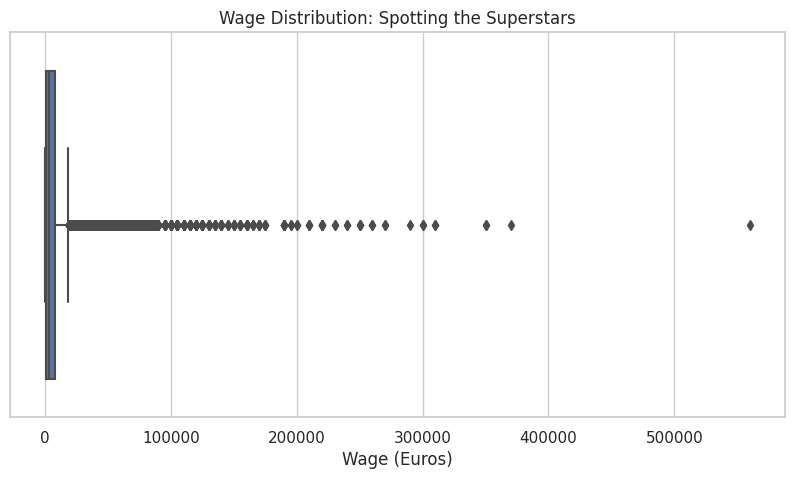

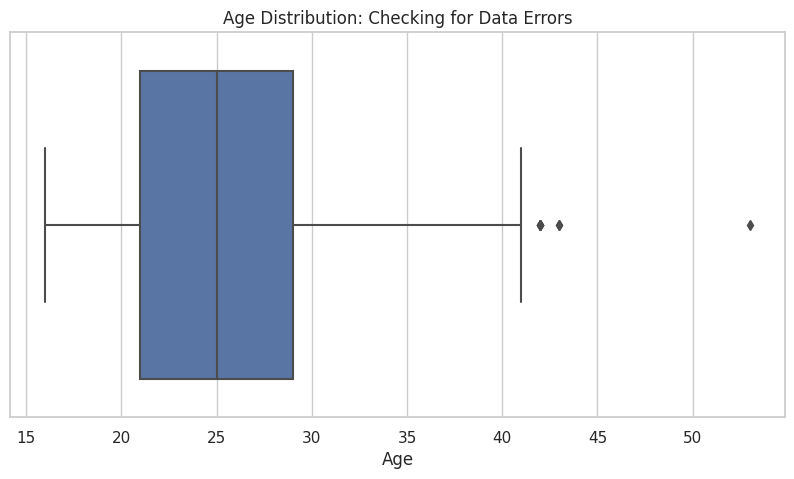

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 5))

# 1. Boxplot for Wage
# This will show how "crushed" the distribution is by the super-rich players
sns.boxplot(x=df['Wage'])
plt.title('Wage Distribution: Spotting the Superstars')
plt.xlabel('Wage (Euros)')
plt.show()

# 2. Boxplot for Age
# This checks for data errors
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'])
plt.title('Age Distribution: Checking for Data Errors')
plt.show()

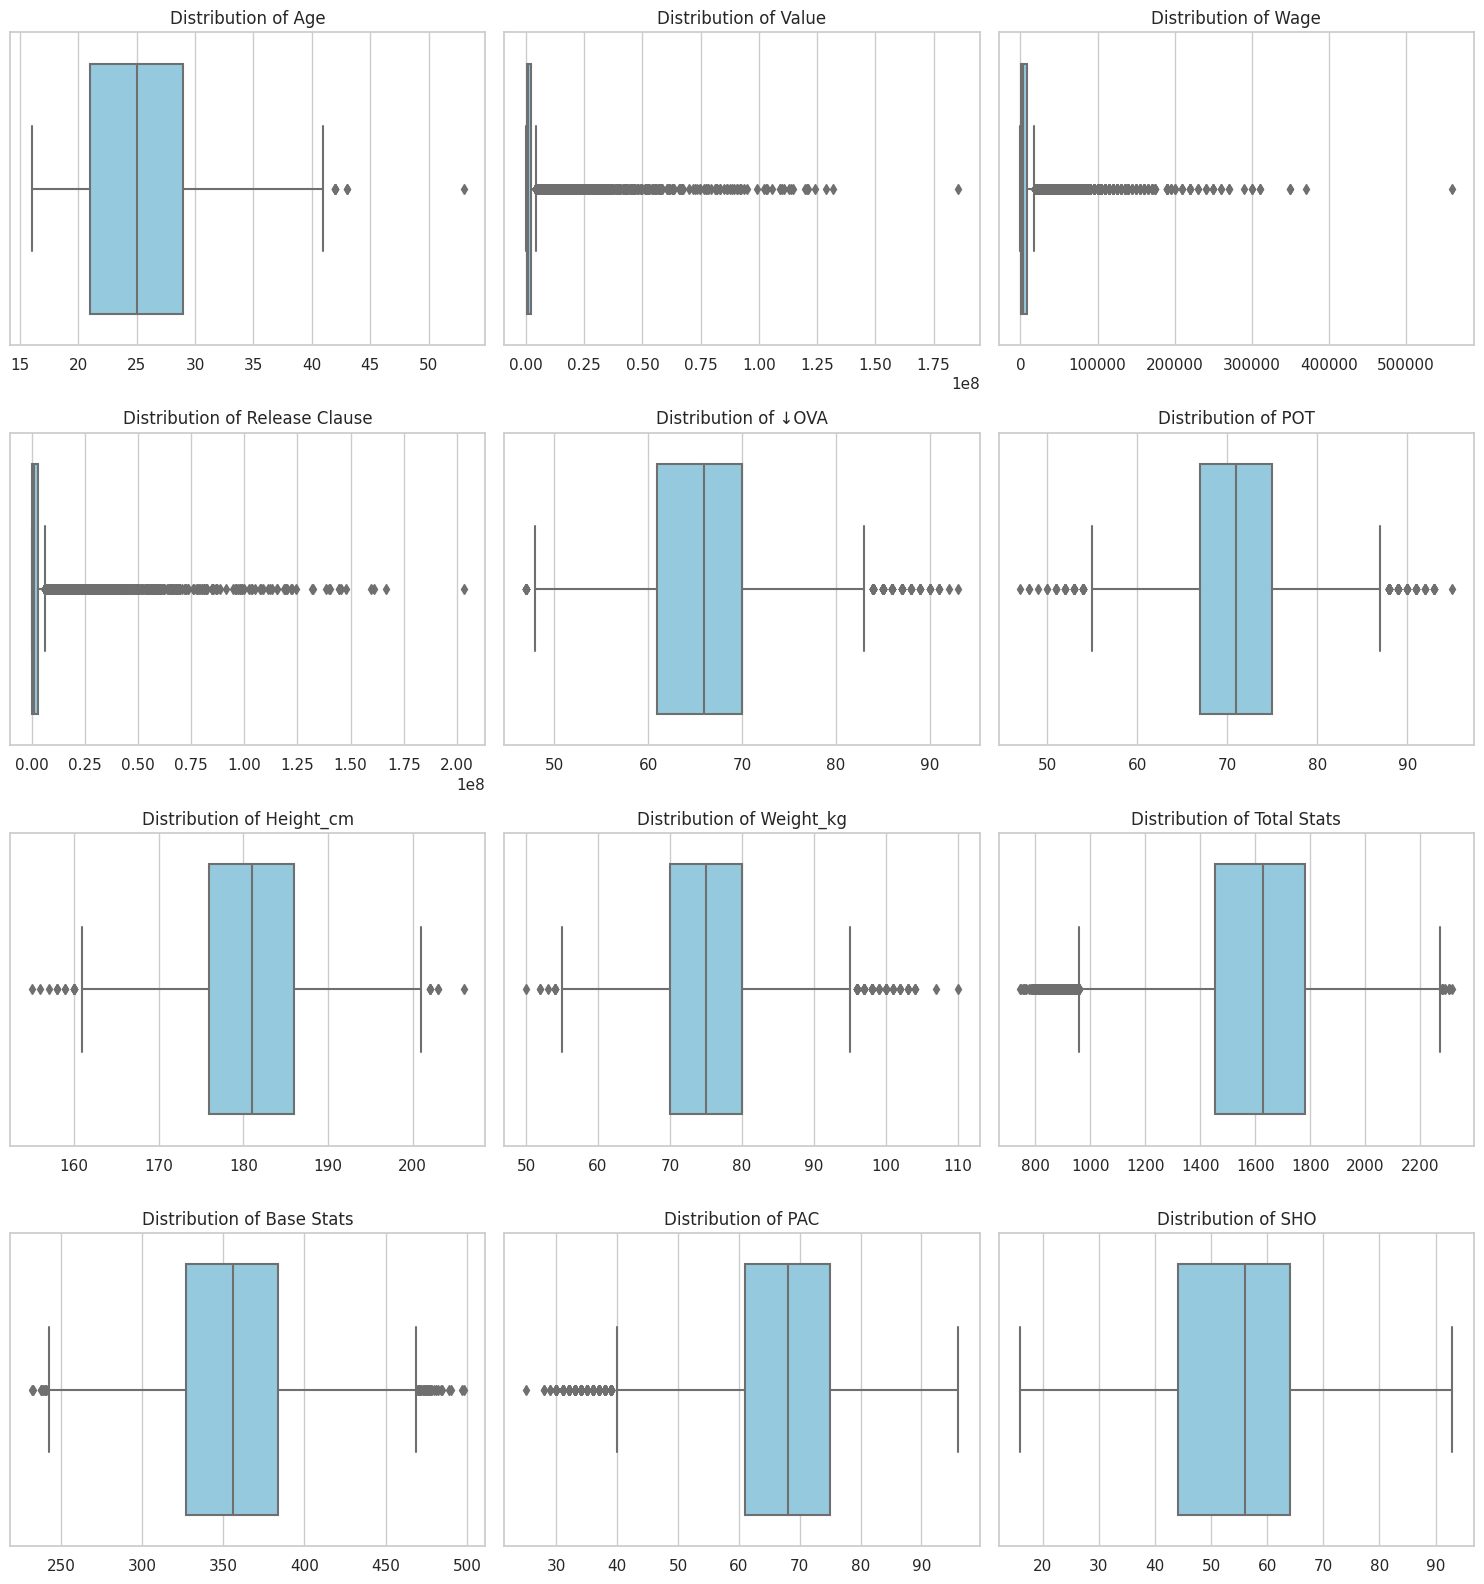

In [66]:
import math

cols_to_plot = ['Age', 'Value', 'Wage', 'Release Clause', '↓OVA', 'POT', 
                'Height_cm', 'Weight_kg', 'Total Stats', 'Base Stats', 'PAC', 'SHO']

# Setup the Grid
num_plots = len(cols_to_plot)
num_cols = 3  # Number of columns in the grid
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(15, num_rows * 4)) # Adjust height based on rows

# Loop and Plot
for i, col in enumerate(cols_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('') # Remove x-label to de-clutter

plt.tight_layout()
plt.show()

## Correlation

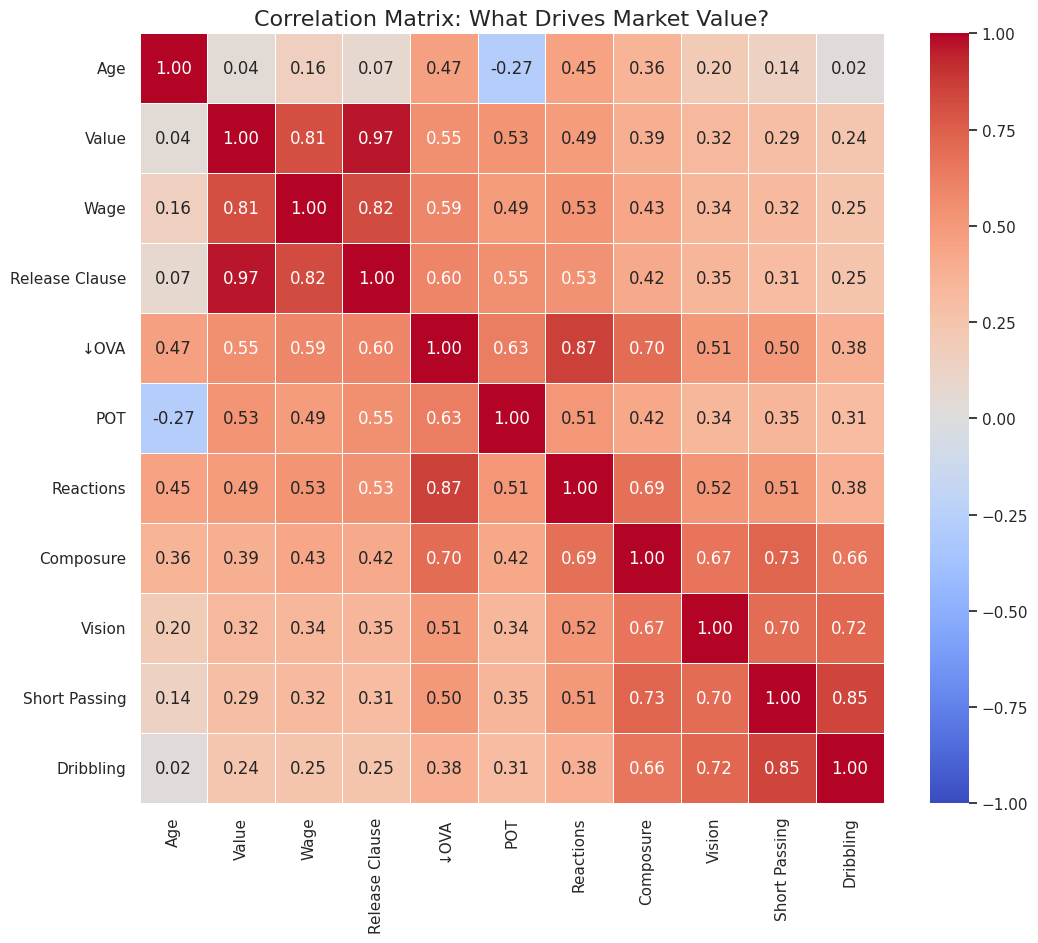

In [68]:
# 1. Select the columns that actually matter
cols_to_correlate = ['Age', 'Value', 'Wage', 'Release Clause', 
                     '↓OVA', 'POT', 'Reactions', 'Composure', 
                     'Vision', 'Short Passing', 'Dribbling']

# 2. Calculate the Correlation Matrix
corr_matrix = df[cols_to_correlate].corr()

# 3. Plot the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,        # Show the numbers
            fmt=".2f",         # 2 decimal places
            cmap='coolwarm',   # Red = High Correlation, Blue = Low
            linewidths=0.5,    # Space between squares
            vmin=-1, vmax=1)   # Fix the scale from -1 to 1

plt.title('Correlation Matrix: What Drives Market Value?', fontsize=16)
plt.show()

### Correlation Analysis: Key Findings

**1. The "Reactions" Dominance (0.87)**
Our analysis reveals that **Reactions** has a stronger correlation with a player's Overall Rating (OVA) than any other specific skill (0.87). This suggests that mental awareness and response time are weightier factors in the FIFA rating algorithm than physical attributes like Sprint Speed or technical attributes like Dribbling.

**2. The "Composure" Factor (0.70)**
Composure shows a strong correlation (0.70) with OVA, indicating that the ability to perform under pressure is a defining characteristic of elite players.

**3. The Financial Formula (0.97)**
The near-perfect correlation between **Value** and **Release Clause** (0.97) confirms that release clauses are largely derived functions of market value, rather than independent variables.

In [71]:
import plotly.express as px

# Let's look at players worth at least €1 Million
top_players = df[df['Value'] > 1_000_000]

fig = px.scatter(top_players, 
                 x='Value', 
                 y='Wage', 
                 hover_name='Name',
                 color='Age',          # Color by Age (Younger = Better Investment)
                 size='↓OVA',           # Size by Overall Rating
                 title='Market Analysis: Undervalued vs. Overpaid Players',
                 labels={'Value': 'Market Value (€)', 'Wage': 'Weekly Wage (€)'})

fig.show()

# Conclusion

In this analysis of the FIFA 21 dataset, we processed raw, messy data into a clean analytical asset.

**Key Findings:**
1.  **The "Reactions" Metric:** We discovered that *Reactions* (0.87) is a stronger predictor of a player's Overall Rating than physical skills like Speed or Dribbling.
2.  **Market Efficiency:** The near-perfect correlation (0.97) between Value and Release Clause suggests a deterministic pricing model in the football market.
3.  **Wage Inequality:** The wage distribution follows a strict Power Law, where the top 1% of "Superstars" earn exponentially more than the median professional.
4.  **Cleaning Impact:** We successfully handled mixed-unit data (lbs/kg, feet/cm) and currency strings (€M/K), ensuring no data was lost due to formatting errors.